In [5]:
# Handwriting number classification
# Datsets - MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

In [6]:
# If we want to have plots within the code itself
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
# In this line we are splitting the data into train and test data 
x_train, x_test = x[0:60000], x[60000:69999]
y_train, y_test = y[0:60000], y[60000:69999]

In [11]:
# We are using KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
# In This line we are uploding a img 
from google.colab import files
uploaded = files.upload()

Saving Webp.net-resizeimage.jpg to Webp.net-resizeimage (3).jpg


array(['3'], dtype=object)

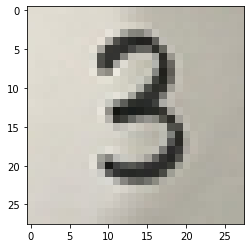

In [13]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# In this line we are changing the dictionary into a list
file_name = list(uploaded.keys())[0] 
# In this line we are opening a img file
uploaded_image = Image.open(file_name)
# In this line we are changing the img into 28 X 28 pixels
smaller_image = uploaded_image.thumbnail((28, 28))
# In this line we are saving the file with a different name
uploaded_image.save("smaller_"+file_name)

# In this line we are coverting the RGB (any other type img) img into Grayscale img
img_grey = cv2.imread("smaller_"+file_name, cv2.IMREAD_GRAYSCALE)

# To ignore the gray colour in the img we are changing it into black or white colour
# if the pixel is grater than 128 then it will covert into 255
img_binary = cv2.threshold(img_grey, 128, 255, cv2.THRESH_BINARY)[1]

# In this line we are joining all the small lists (rows) into one big list (entire img)
img_binary_flatten = img_binary.flatten()

# In this line we are inverting the binary value of the img 
# Eg : 1, 0, 1, 0, into  0, 1, 0, 1,
img_binary_invert = np.invert(img_binary_flatten)

# In this line we are ploting the img
plt.imshow(uploaded_image, cmap=matplotlib.cm.binary)

# In this line we are predicting our model
clf.predict([img_binary_invert])

In [15]:
from sklearn import metrics
# In this line we are using confusion matrix to see the performance of our model
y_pred = clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    9,  996,    2,    0,    0,    0,   13,    2,    0],
       [   0,    2,    4,  976,    1,   13,    1,    7,    3,    3],
       [   1,    6,    0,    0,  950,    0,    4,    2,    0,   19],
       [   6,    1,    0,   11,    2,  859,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  943,    0,    0,    0],
       [   0,   21,    5,    0,    1,    0,    0,  991,    0,   10],
       [   8,    2,    4,   16,    8,   11,    3,    4,  914,    4],
       [   4,    5,    2,    8,    9,    2,    1,    8,    2,  968]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy: 97.04970497049705


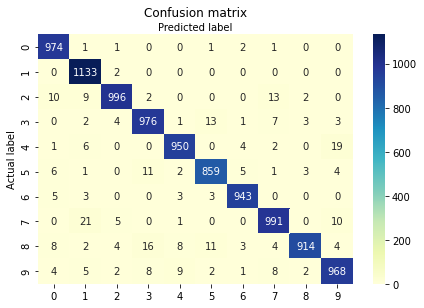

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat map
# To visualize the accuracy of our model we are using heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)